In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle
import os

In [11]:
data = pd.read_csv("newConcatVectors.csv",header=None)
data = data.sample(frac=1)
data = data.reset_index(drop=True)
labels = data[0]
data = data.drop(0,axis='columns')
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = np.asarray(y_train.values.tolist())
y_test = np.asarray(y_test.values.tolist())
print(X_train.shape)
print(X_test.shape)

(205, 2040)
(88, 2040)


In [12]:
def modelAccuracy(modelname, predictions, test_gs):
    mcounter = 0
    for i in range(len(predictions)):
        if(predictions[i]!=test_gs[i]):
            mcounter+=1
    print(str(modelname)+" accuracy: "+str((1-(mcounter/len(predictions)))))
    return (1-(mcounter/len(predictions)))


In [13]:
def displayStats(predictions, truth):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    cmat = confusion_matrix(truth,predictions)
    disp = ConfusionMatrixDisplay(cmat)
    disp.plot()
    plt.show()

# Basic Catboost Classifier to establish a baseline

---

In [8]:
from catboost import CatBoostClassifier
cbm = CatBoostClassifier(verbose=0)
cbm.fit(X_train,y_train)

In [9]:
pred_test = cbm.predict(X_test)
modelAccuracy("CatBoost", pred_test, y_test)
soft_preds = cbm.predict_proba(X_test)[:,1]
print("CatBoost ROC-AUC: "+ str(roc_auc_score(y_test,soft_preds)))

CatBoost accuracy: 0.6363636363636364
CatBoost ROC-AUC: 0.6930232558139535


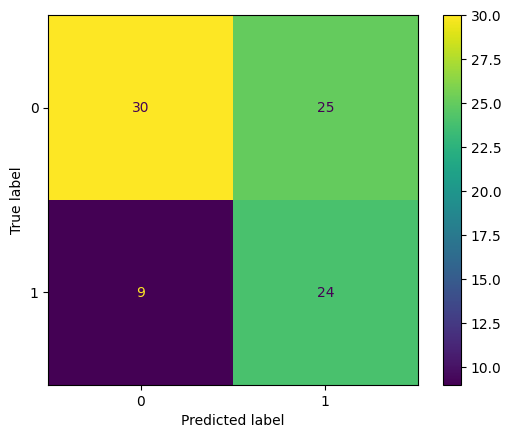

In [82]:
displayStats(pred_test,y_test)

# Sanity Checking
---
Catboost accuracy is better than expected, so we want to ensure that the dataset is not messed up in any way. As such, we're going to train catboost on completely random data of the same shape, and make sure that it does worse than our actual dataset.

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(175, 2040)
(118, 2040)
(175,)
(118,)


In [44]:
rand_X_train = np.random.rand(X_train.shape[0],X_train.shape[1])
rand_X_train.shape

(175, 2040)

In [45]:
cbm2 = CatBoostClassifier()
cbm2.fit(rand_X_train,y_train)

Learning rate set to 0.004895
0:	learn: 0.6913314	total: 94.7ms	remaining: 1m 34s
1:	learn: 0.6896513	total: 203ms	remaining: 1m 41s
2:	learn: 0.6886204	total: 315ms	remaining: 1m 44s
3:	learn: 0.6864293	total: 432ms	remaining: 1m 47s
4:	learn: 0.6849336	total: 545ms	remaining: 1m 48s
5:	learn: 0.6832765	total: 658ms	remaining: 1m 48s
6:	learn: 0.6807312	total: 771ms	remaining: 1m 49s
7:	learn: 0.6789782	total: 885ms	remaining: 1m 49s
8:	learn: 0.6782018	total: 997ms	remaining: 1m 49s
9:	learn: 0.6764554	total: 1.11s	remaining: 1m 49s
10:	learn: 0.6749742	total: 1.22s	remaining: 1m 50s
11:	learn: 0.6737090	total: 1.34s	remaining: 1m 50s
12:	learn: 0.6718565	total: 1.45s	remaining: 1m 50s
13:	learn: 0.6698978	total: 1.56s	remaining: 1m 49s
14:	learn: 0.6677479	total: 1.68s	remaining: 1m 50s
15:	learn: 0.6655687	total: 1.79s	remaining: 1m 50s
16:	learn: 0.6631783	total: 1.9s	remaining: 1m 49s
17:	learn: 0.6614976	total: 2.02s	remaining: 1m 50s
18:	learn: 0.6598868	total: 2.13s	remaining:

In [46]:
pred_test2 = cbm2.predict(X_test)
modelAccuracy("CatBoost RANDOM", pred_test2, y_test)
soft_preds2 = cbm2.predict_proba(X_test)[:,1]
print("CatBoost RANDOM ROC-AUC: "+ str(roc_auc_score(y_test,soft_preds2)))

CatBoost RANDOM accuracy: 0.4915254237288136
CatBoost RANDOM ROC-AUC: 0.4184027777777778


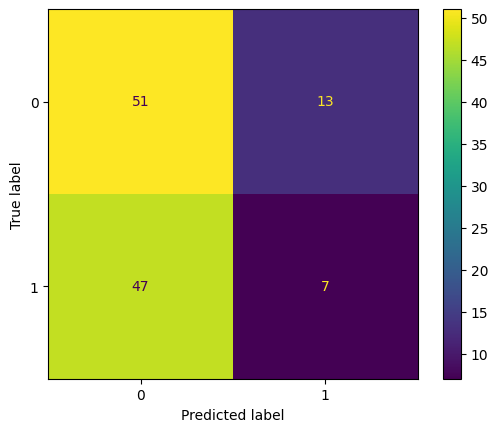

In [47]:
displayStats(pred_test2,y_test)

## Sanity Checking part 2

Generating an accuracy histogram

---

In [15]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle
import os

accuracies = []
roc_aucs = []
for i in range(100):
    data = pd.read_csv("newConcatVectors.csv",header=None)
    data = data.sample(frac=1)
    data = data.reset_index(drop=True)
    labels = data[0]
    data = data.drop(0,axis='columns')
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = np.asarray(y_train.values.tolist())
    y_test = np.asarray(y_test.values.tolist())
    cbm = CatBoostClassifier(silent=True)
    cbm.fit(X_train,y_train)
    preds = cbm.predict(X_test)
    softpreds = cbm.predict_proba(X_test)[:,1]
    accuracies.append(accuracy_score(y_test,preds))
    roc_aucs.append(roc_auc_score(y_test,softpreds))

<Figure size 432x288 with 0 Axes>

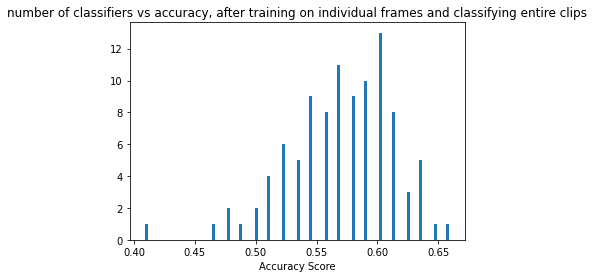

<Figure size 432x288 with 0 Axes>

In [21]:
from matplotlib import pyplot as plt
plt.hist(accuracies,bins=100)
plt.title("number of classifiers vs accuracy, after training on individual frames and classifying entire clips")
plt.xlabel("Accuracy Score") 
plt.figure()

<Figure size 432x288 with 0 Axes>

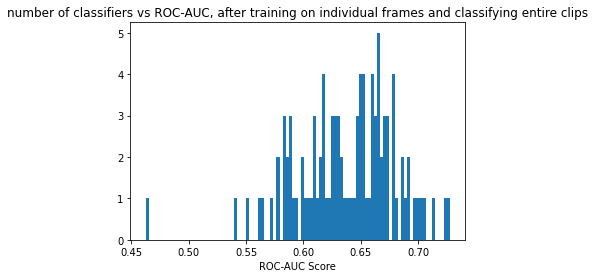

<Figure size 432x288 with 0 Axes>

In [20]:
plt.hist(roc_aucs, bins=100)
plt.title("number of classifiers vs ROC-AUC, after training on individual frames and classifying entire clips")
plt.xlabel("ROC-AUC Score")
plt.figure()

In [22]:
accuracies = np.asarray(accuracies)
print("STD Deviation of accuracy: "+str(np.std(accuracies)))
print("Mean of accuracy: "+str(np.mean(accuracies)))

STD Deviation of accuracy: 0.04357046989771213
Mean of accuracy: 0.5701136363636364


In [23]:
roc_aucs = np.asarray(roc_aucs)
print("STD Deviation of ROC-AUC: "+str(np.std(roc_aucs)))
print("mean of ROC-AUC: "+str(np.mean(roc_aucs)))

STD Deviation of ROC-AUC: 0.04332054302000327
mean of ROC-AUC: 0.6376036998510078


## Conclusions
---
We can see that with completely random data the catboost classifier hovers around 50%. As such, we know our data is actually doing something, because without it, we are effectively predicting on random chance. 

However, we see that the performance of the model is not great, and also does not stabilize well. Essentially, the model's accuracy has a lot of variance in it's results, meaning that the model most likely is not generalizing to the same type of model across multiple train-test splits. This could indicate that the amount of data necessary to utilize this representation is much higher than what we currently have. As such, we should explore other feature representations, and models that can make use of those instead.

One idea to cause the model to converge across multiple splits is to create a model that classifies each frame as good/bad and then runs across a clip and constructs a majority vote. This will give us a larger corpus of data (each clip has 60 frames, so we will have 60x the data), and may help the model stabilize.